Image Shape: (180, 217, 181)


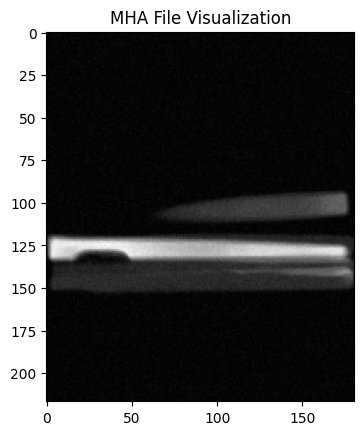

In [11]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Load the .mha file
image = sitk.ReadImage('brainweb165a10f17.mha')

# Convert to numpy array for visualization
image_array = sitk.GetArrayFromImage(image)

print('Image Shape:', image_array.shape)

# Visualize using matplotlib
plt.imshow(image_array[179], cmap='gray')
plt.title('MHA File Visualization')
plt.show()

In [17]:
import itk

input_image_path = "brainweb165a10f17.mha"
output_image_path = "subsampled_Brain.mha"
factorX, factorY, factorZ = 2.0, 2.0, 2.0
Dimension = 3

# Pixel types
InputPixelType = itk.UC  # Unsigned char
InternalPixelType = itk.F  # Float
OutputPixelType = itk.UC  # Unsigned char

# Image types
InputImageType = itk.Image[InputPixelType, Dimension]
InternalImageType = itk.Image[InternalPixelType, Dimension]
OutputImageType = itk.Image[OutputPixelType, Dimension]

# Read input image
reader = itk.ImageFileReader[InputImageType].New()
reader.SetFileName(input_image_path)
reader.Update()

input_image = reader.GetOutput()

# Cast input image to internal type for processing
caster = itk.CastImageFilter[InputImageType, InternalImageType].New()
caster.SetInput(input_image)

# Define Gaussian smoothing filters for X, Y, Z
smootherX = itk.RecursiveGaussianImageFilter[InternalImageType, InternalImageType].New()
smootherY = itk.RecursiveGaussianImageFilter[InternalImageType, InternalImageType].New()
smootherZ = itk.RecursiveGaussianImageFilter[InternalImageType, InternalImageType].New()

# Connect the filters in cascade
smootherX.SetInput(caster.GetOutput())
smootherY.SetInput(smootherX.GetOutput())
smootherZ.SetInput(smootherY.GetOutput())

# Calculate sigma values from input spacing and scale factors
input_spacing = input_image.GetSpacing()

sigmaX = input_spacing[0] * factorX
sigmaY = input_spacing[1] * factorY
sigmaZ = input_spacing[2] * factorZ

smootherX.SetSigma(sigmaX)
smootherY.SetSigma(sigmaY)
smootherZ.SetSigma(sigmaZ)

# Set direction and normalization
smootherX.SetDirection(0)
smootherY.SetDirection(1)
smootherZ.SetDirection(2)

smootherX.SetNormalizeAcrossScale(False)
smootherY.SetNormalizeAcrossScale(False)
smootherZ.SetNormalizeAcrossScale(False)

# Setup resampling filter
try:
    resampler = itk.ResampleImageFilter[InternalImageType, OutputImageType].New()
except itk.TemplateTypeError:
    print("The ResampleImageFilter does not support the given types. Please check the image types and ITK version.")
    raise

# Set the identity transform
transform = itk.IdentityTransform[itk.D, Dimension].New()
transform.SetIdentity()
resampler.SetTransform(transform)

# Linear interpolator
interpolator = itk.LinearInterpolateImageFunction[InternalImageType, itk.D].New()
resampler.SetInterpolator(interpolator)

# Default pixel value for areas outside input image bounds
resampler.SetDefaultPixelValue(0)

# Output image spacing
spacing = [input_spacing[0] * factorX, input_spacing[1] * factorY, input_spacing[2] * factorZ]
resampler.SetOutputSpacing(spacing)

# Keep origin and direction from the input image
resampler.SetOutputOrigin(input_image.GetOrigin())
resampler.SetOutputDirection(input_image.GetDirection())

# Compute size of the resampled image
input_size = input_image.GetLargestPossibleRegion().GetSize()

size = [
    int(input_size[0] / factorX),
    int(input_size[1] / factorY),
    int(input_size[2] / factorZ)
]
resampler.SetSize(size)

# Set the input of the resampler to the output of the smoother
resampler.SetInput(smootherZ.GetOutput())

# Write the result to file
writer = itk.ImageFileWriter[OutputImageType].New()
writer.SetFileName(output_image_path)
writer.SetInput(resampler.GetOutput())

writer.Update()


The ResampleImageFilter does not support the given types. Please check the image types and ITK version.


TemplateTypeError: itk.ResampleImageFilter is not wrapped for input type `itk.Image[itk.F,3], itk.Image[itk.UC,3]`.

To limit the size of the package, only a limited number of
types are available in ITK Python. To print the supported
types, run the following command in your python environment:

    itk.ResampleImageFilter.GetTypes()

Possible solutions:
* If you are an application user:
** Convert your input image into a supported format (see below).
** Contact developer to report the issue.
* If you are an application developer, force input images to be
loaded in a supported pixel type.

    e.g.: instance = itk.ResampleImageFilter[itk.Image[itk.SS,2], itk.Image[itk.SS,2]].New(my_input)

* (Advanced) If you are an application developer, build ITK Python yourself and
turned to `ON` the corresponding CMake option to wrap the pixel type or image
dimension you need. When configuring ITK with CMake, you can set
`ITK_WRAP_${type}` (replace ${type} with appropriate pixel type such as
`double`). If you need to support images with 4 or 5 dimensions, you can add
these dimensions to the list of dimensions in the CMake variable
`ITK_WRAP_IMAGE_DIMS`.

Supported input types:

itk.Image[itk.SS,2]
itk.Image[itk.SS,3]
itk.Image[itk.SS,4]
itk.Image[itk.UC,2]
itk.Image[itk.UC,3]
itk.Image[itk.UC,4]
itk.Image[itk.US,2]
itk.Image[itk.US,3]
itk.Image[itk.US,4]
itk.Image[itk.F,2]
itk.Image[itk.F,3]
itk.Image[itk.F,4]
itk.Image[itk.D,2]
itk.Image[itk.D,3]
itk.Image[itk.D,4]
itk.Image[itk.Vector[itk.F,2],2]
itk.Image[itk.Vector[itk.F,2],3]
itk.Image[itk.Vector[itk.F,2],4]
itk.Image[itk.Vector[itk.F,3],2]
itk.Image[itk.Vector[itk.F,3],3]
itk.Image[itk.Vector[itk.F,3],4]
itk.Image[itk.Vector[itk.F,4],2]
itk.Image[itk.Vector[itk.F,4],3]
itk.Image[itk.Vector[itk.F,4],4]
itk.Image[itk.RGBPixel[itk.UC],2]
itk.Image[itk.RGBPixel[itk.UC],3]
itk.Image[itk.RGBPixel[itk.UC],4]
itk.Image[itk.RGBAPixel[itk.UC],2]
itk.Image[itk.RGBAPixel[itk.UC],3]
itk.Image[itk.RGBAPixel[itk.UC],4]
itk.VectorImage[itk.UC,2]
itk.VectorImage[itk.SS,2]
itk.VectorImage[itk.US,2]
itk.VectorImage[itk.F,2]
itk.VectorImage[itk.D,2]
itk.VectorImage[itk.UC,3]
itk.VectorImage[itk.SS,3]
itk.VectorImage[itk.US,3]
itk.VectorImage[itk.F,3]
itk.VectorImage[itk.D,3]
itk.VectorImage[itk.UC,4]
itk.VectorImage[itk.SS,4]
itk.VectorImage[itk.US,4]
itk.VectorImage[itk.F,4]
itk.VectorImage[itk.D,4]
itk.PhasedArray3DSpecialCoordinatesImage[itk.F]
itk.PhasedArray3DSpecialCoordinatesImage[itk.UC]
